In [1]:
from google.colab import files

In [2]:
files = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle/

In [4]:
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import numpy as np
import pandas as pd
import os
from PIL import Image

#Visualization and evaluation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from keras.preprocessing import image

# Net libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img ,img_to_array
from tensorflow.keras import Model
from tensorflow.keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

100% 329M/330M [00:01<00:00, 229MB/s]
100% 330M/330M [00:01<00:00, 194MB/s]


In [7]:
!unzip face-mask-12k-images-dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: dataset/Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: dataset/Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: dataset/Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: dataset/Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: dataset/Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: dataset/Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: dataset/Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: dataset/Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: dataset/Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: dataset/Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: dataset/Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: dataset/Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: dataset/Face Mask Dataset/Train/WithoutMask/1868.png

In [8]:
path = '../content/dataset/Face Mask Dataset/'
with_mask = path+'/Train/WithMask/1035.png'
without_mask= path+'/Train/WithoutMask/10.png'

CLASSES = ['Without Mask' ,'With Mask']

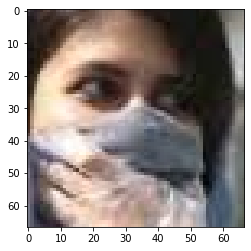

In [9]:
plt.imshow(load_img(with_mask))

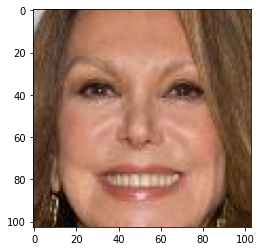

In [10]:
plt.imshow(load_img(without_mask))

In [11]:
train_dir = train_dir = os.path.join('/content/dataset/Face Mask Dataset/Train')

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2
)

In [12]:
batch_size = 128 

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = batch_size,
    subset = 'training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = batch_size,
    subset = 'validation'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
model = tf.keras.models.Sequential([
    # First Convolutional
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Second Convolutional
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third Convolutional
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      print("\nAccuracy & Validation Accuracy Di Atas 95%")
      self.model.stop_training = True

callbacks = myCallback()

In [15]:
# Train Model
history = model.fit(train_gen, 
                    epochs = 40, 
                    steps_per_epoch = 8000//batch_size, 
                    validation_data = val_gen, 
                    verbose = 1, 
                    validation_steps = 2000//batch_size,
                    callbacks = [callbacks])

Epoch 1/40
62/62 [==============================] - 86s 856ms/step - loss: 1.0882 - accuracy: 0.7475 - val_loss: 0.6092 - val_accuracy: 0.7146
Epoch 2/40
62/62 [==============================] - 51s 821ms/step - loss: 0.2183 - accuracy: 0.9202 - val_loss: 0.2118 - val_accuracy: 0.9193
Epoch 3/40
62/62 [==============================] - 51s 827ms/step - loss: 0.2003 - accuracy: 0.9258 - val_loss: 0.0846 - val_accuracy: 0.9729
Epoch 4/40
62/62 [==============================] - 51s 819ms/step - loss: 0.1428 - accuracy: 0.9460 - val_loss: 0.0957 - val_accuracy: 0.9677
Epoch 5/40
62/62 [==============================] - 51s 820ms/step - loss: 0.1204 - accuracy: 0.9567 - val_loss: 0.0667 - val_accuracy: 0.9755

Accuracy & Validation Accuracy Di Atas 95%


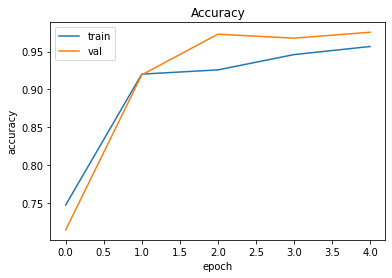

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

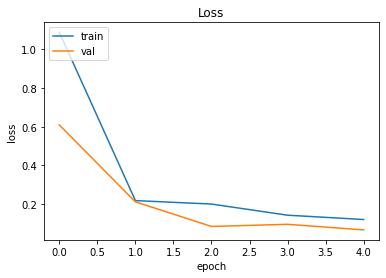

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp6n9of2ap/assets


In [19]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root  38192560 Jul  5 13:10 model.tflite
